In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) =mnist.load_data()

In [3]:
#One hot encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

 The number is:  7


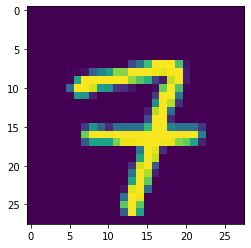

In [4]:
#Showing sample image
plt.imshow(X_train[324])
print(' The number is: ',y_train[324])

In [10]:
# Creating the ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Creating an instance early stopping
early_stop = EarlyStopping(monitor='val_loss',patience=2,verbose=1)

In [13]:
# Fitting the training set on the model and validating it using the test set
model.fit(x=X_train,y=y_cat_train,epochs=200,verbose=1,
          validation_data=(X_test,y_cat_test),callbacks=[early_stop])


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 15s 254us/sample - loss: 0.9657 - accuracy: 0.8471 - val_loss: 0.3640 - val_accuracy: 0.9085
Epoch 2/200
60000/60000 [==============================] - 14s 229us/sample - loss: 0.2892 - accuracy: 0.9258 - val_loss: 0.2581 - val_accuracy: 0.9353
Epoch 3/200
60000/60000 [==============================] - 14s 229us/sample - loss: 0.2271 - accuracy: 0.9415 - val_loss: 0.2269 - val_accuracy: 0.9428
Epoch 4/200
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1858 - accuracy: 0.9519 - val_loss: 0.2193 - val_accuracy: 0.9517
Epoch 5/200
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1654 - accuracy: 0.9581 - val_loss: 0.1876 - val_accuracy: 0.9523
Epoch 6/200
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1379 - accuracy: 0.9644 - val_loss: 0.1645 - val_accuracy: 0.9587
Epoch 7/200
60000/60000 [=============

In [14]:
# Getting the final results of the training
results = pd.DataFrame(model.history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.965703,0.847117,0.363966,0.9085
1,0.289178,0.925800,0.258113,0.9353
2,0.227127,0.941500,0.226942,0.9428
3,0.185776,0.951883,0.219253,0.9517
4,0.165378,0.958133,0.187592,0.9523
5,0.137864,0.964433,0.164499,0.9587
6,0.117055,0.968233,0.178325,0.9598
7,0.100305,0.973217,0.140911,0.9652
8,0.090479,0.974883,0.145507,0.9642
9,0.080332,0.977967,0.124882,0.9694


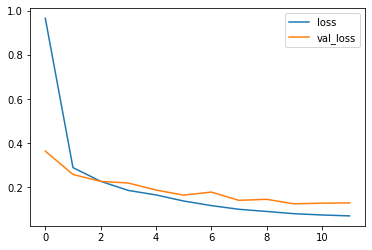

In [15]:
results[['loss','val_loss']].plot()

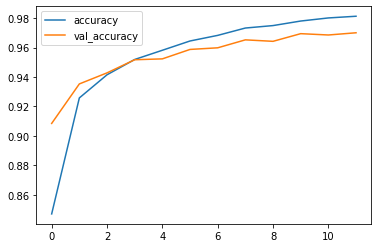

In [16]:
results[['accuracy','val_accuracy']].plot()

In [18]:
# Predicting the classes for test set and storing the them along with the true values
predictions = model.predict_classes(X_test)
true_values = list(y_test)
predicted_values = list(predictions)
sub = pd.DataFrame({'True Values':true_values,'Predictions':predictions})
sub.to_csv('./True_vs_Predicted_MNIST_ANN.csv',index=False)

In [19]:
# Evaluting the model using confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,predictions)
con_mat

array([[ 971,    0,    0,    1,    0,    2,    2,    1,    1,    2],
       [   0, 1125,    2,    1,    0,    1,    2,    0,    4,    0],
       [   8,    4,  986,   12,    5,    0,    1,    6,    9,    1],
       [   0,    0,    3,  992,    0,    5,    0,    2,    5,    3],
       [   0,    1,    3,    1,  944,    0,    6,    3,    1,   23],
       [   3,    1,    1,   16,    2,  851,    8,    0,    6,    4],
       [   7,    3,    0,    0,    8,    3,  930,    0,    7,    0],
       [   1,    6,    5,    9,    0,    1,    0,  994,    0,   12],
       [  10,    2,    2,   16,    2,    3,    2,    2,  929,    6],
       [   3,    2,    1,   12,    3,    0,    0,    7,    3,  978]],
      dtype=int64)